In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

## Auxiliary functions

In [2]:
def print_stats(v_range, y_values, y_prime_values):
    assert y_values.shape == v_range.shape
    assert y_prime_values.shape == v_range.shape
    print(f"Function statistics in the range [{v_range.min()}, {v_range.max()}]:")
    print(f" f(x): | Mean: {y_values.mean():+6.2f} | Std: {y_values.std():+6.2f} | Min: {y_values.min():+6.2f} | Max: {y_values.max():+6.2f} |")
    print(f"f'(x): | Mean: {y_prime_values.mean():+6.2f} | Std: {y_prime_values.std():+6.2f} | Min: {y_prime_values.min():+6.2f} | Max: {y_prime_values.max():+6.2f} |")

In [3]:
def plot(x_values, y_values, y_prime_values, figsize=(16, 5)):
    x_values, y_values, y_prime_values = x_values.squeeze(), y_values.squeeze(), y_prime_values.squeeze()
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    axs[0].scatter(x_values, y_values, s=2, zorder=2)
    axs[0].grid(True)
    axs[0].set_title('y')
    axs[1].grid(True)
    axs[1].scatter(x_values, y_prime_values, s=2, zorder=2)
    axs[1].set_title('y_prime')

In [4]:
def plot_bipolar(x_values, y_values, y_prime_values, figsize=(16, 5)):
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    axs[0].scatter(x_values[:, ::2], y_values[:,::2], s=2, zorder=2)
    axs[0].scatter(x_values[:, 1::2], y_values[:,1::2], s=2, zorder=2)
    axs[0].grid(True)
    axs[0].set_title('y')
    axs[1].grid(True)
    axs[1].scatter(x_values[:, ::2], y_prime_values[:,::2], s=2, zorder=2)
    axs[1].scatter(x_values[:, 1::2], y_prime_values[:,1::2], s=2, zorder=2)
    axs[1].set_title('y_prime')

In [5]:
value_range = np.arange(-256, 256, 1)

In [6]:
bound = np.iinfo(np.int8).max * 1.5
bound

190.5

In [7]:
x = np.arange(-bound, bound, 1)

In [8]:
x = x[np.newaxis, :]
x.shape

(1, 381)

## PocketTanh

In [9]:
from lib.layers.activations import PocketTanh

In [10]:
f = PocketTanh()
f.train()
y = f(x)
y_prime = 1 / f.grad_inv

In [11]:
print_stats(value_range, f(value_range),  1 / f.grad_inv)

Function statistics in the range [-256, 255]:
 f(x): | Mean:  -0.24 | Std: +110.94 | Min: -127.00 | Max: +127.00 |
f'(x): | Mean:  +0.23 | Std:  +0.34 | Min:  +0.00 | Max:  +1.00 |


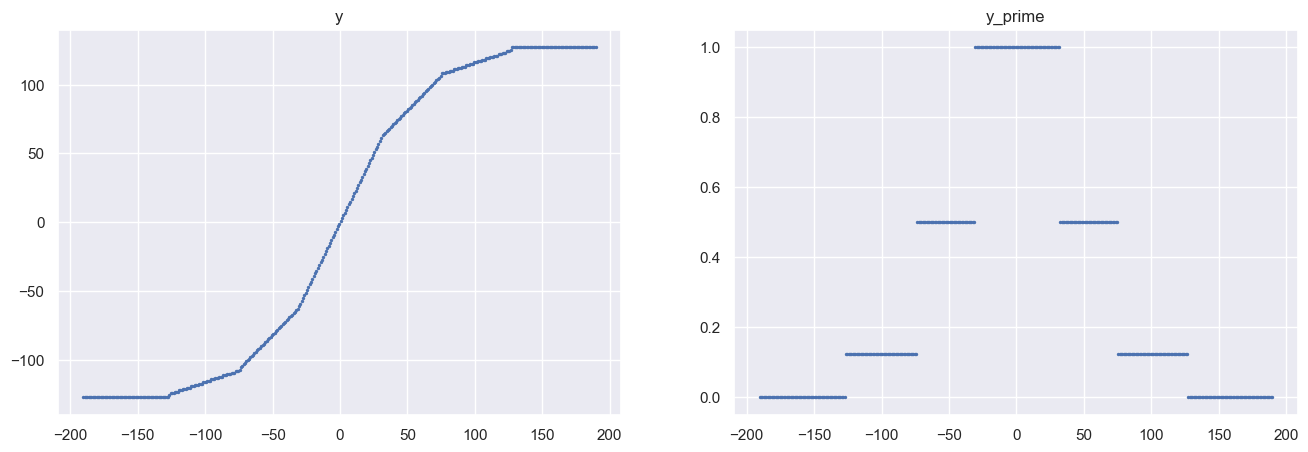

In [12]:
plot(x, y, y_prime)

## PocketReLU

In [13]:
from lib.layers.activations import PocketReLU

In [14]:
f = PocketReLU()
f.train()
y = f(x)
y_prime = f.backward(np.ones_like(x), 1)

In [15]:
print_stats(value_range, f(value_range),  f.backward(np.ones_like(value_range), 1))

Function statistics in the range [-256, 255]:
 f(x): | Mean: +47.62 | Std: +55.80 | Min:  +0.00 | Max: +127.00 |
f'(x): | Mean:  +0.25 | Std:  +0.43 | Min:  +0.00 | Max:  +1.00 |


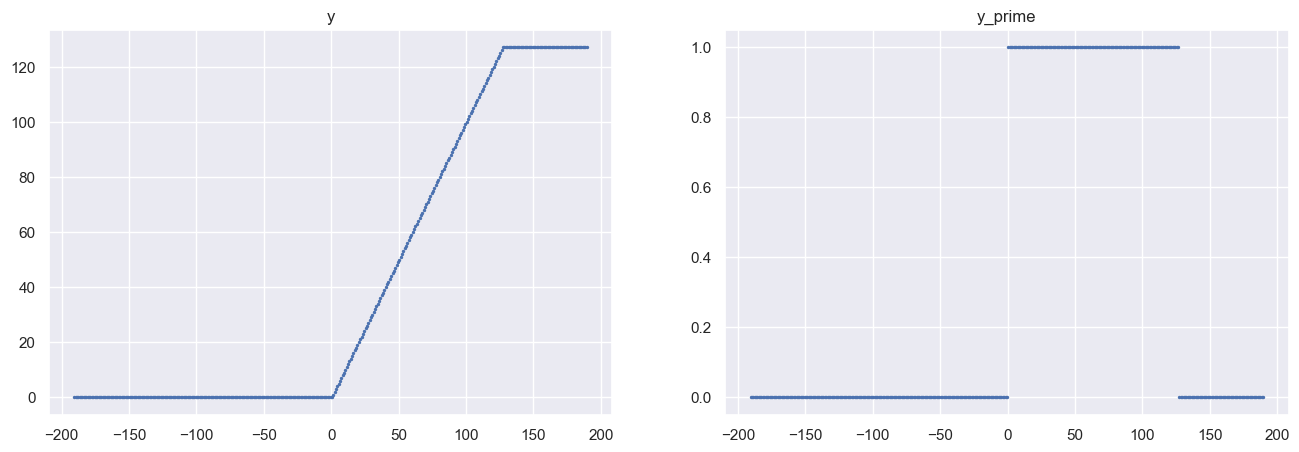

In [16]:
plot(x, y, y_prime)

## BipolarPocketReLU

In [18]:
from lib.layers.activations import BipolarPocketReLU

In [19]:
f = BipolarPocketReLU()
f.train()
y = f(x)
y_prime = f.backward(np.ones_like(x), 1)

In [20]:
f = BipolarPocketReLU()
f.train()
print_stats(value_range[None,:], f(value_range[None,:]), f.backward(np.ones_like(value_range[None, :]), 1))

Function statistics in the range [-256, 255]:
 f(x): | Mean:  -0.12 | Std: +73.36 | Min: -127.00 | Max: +127.00 |
f'(x): | Mean:  +0.25 | Std:  +0.43 | Min:  +0.00 | Max:  +1.00 |


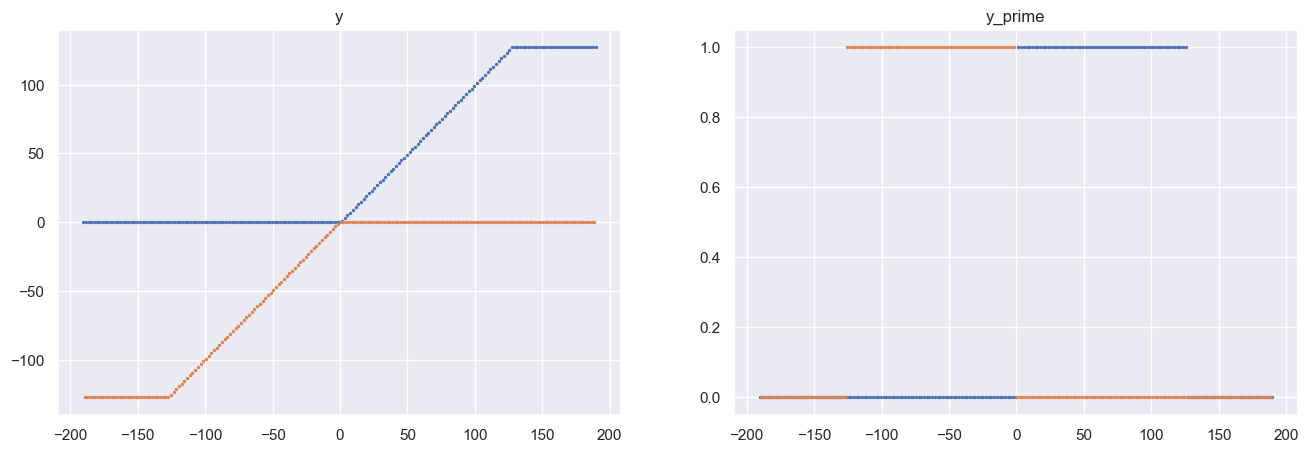

In [21]:
plot_bipolar(x, y, y_prime)

## PocketLeakyReLU

In [22]:
from lib.layers.activations import PocketLeakyReLU

In [23]:
f = PocketLeakyReLU(negative_slope_inv=4)
f.train()
y = f(x)
y_prime = f.backward(np.full_like(x, 128), 1) / 128

In [24]:
print_stats(value_range, f(value_range), f.backward(np.full_like(value_range, 128), 1) / 128)

Function statistics in the range [-256, 255]:
 f(x): | Mean: +35.94 | Std: +66.43 | Min: -31.00 | Max: +127.00 |
f'(x): | Mean:  +0.31 | Std:  +0.41 | Min:  +0.00 | Max:  +1.00 |


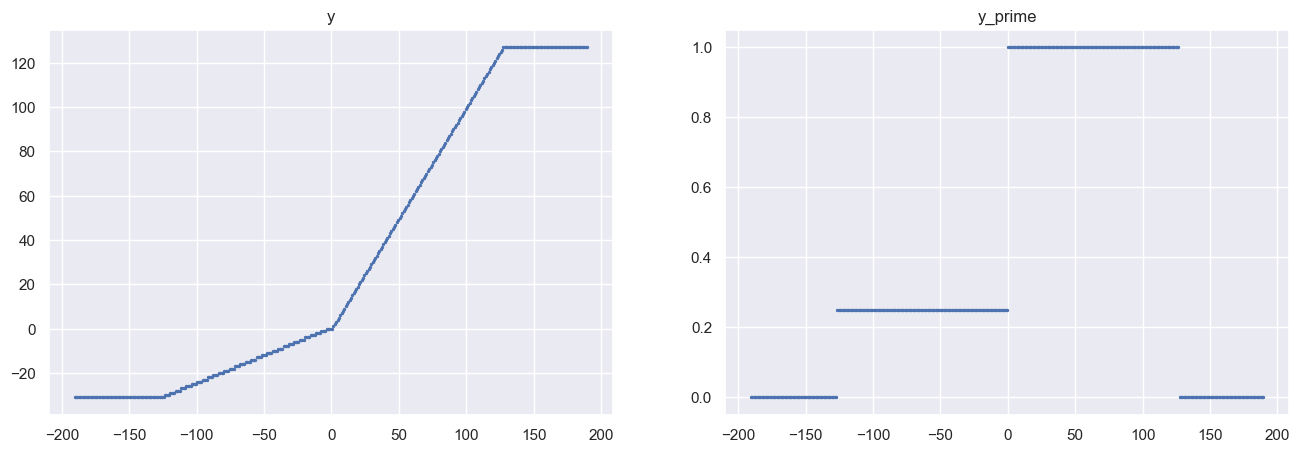

In [25]:
plot(x, y, y_prime)

## NitroLeakyReLU

In [30]:
from lib.layers.activations import NitroLeakyReLU

In [31]:
f = NitroLeakyReLU(negative_slope_inv=4)
f.train()
y = f(x)
y_prime = f.backward(np.full_like(x, 128), 1) / 128

In [32]:
print_stats(value_range, f(value_range), f.backward(np.full_like(value_range, 128), 1) / 128)

Function statistics in the range [-256, 255]:
 f(x): | Mean:  -0.06 | Std: +66.43 | Min: -67.00 | Max: +91.00 |
f'(x): | Mean:  +0.31 | Std:  +0.41 | Min:  +0.00 | Max:  +1.00 |


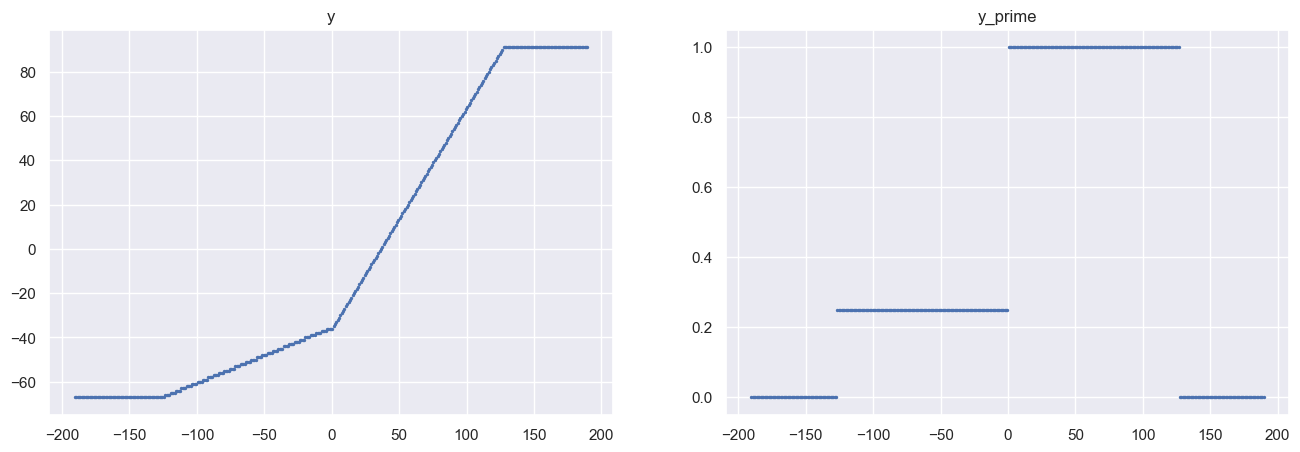

In [33]:
plot(x, y, y_prime)

## BipolarLeakyReLU

In [34]:
from lib.layers.activations import BipolarLeakyReLU

In [35]:
f = BipolarLeakyReLU(negative_slope_inv=4)
f.train()
y = f(x)
y_prime = f.backward(np.full_like(x, 128), 1) / 128

In [36]:
f = BipolarLeakyReLU(negative_slope_inv=4)
f.train()
print_stats(value_range[None,:], f(value_range[None,:]), f.backward(np.full_like(value_range[None,:], 128), 1) / 128)

Function statistics in the range [-256, 255]:
 f(x): | Mean:  -0.19 | Std: +75.53 | Min: -127.00 | Max: +127.00 |
f'(x): | Mean:  +0.31 | Std:  +0.41 | Min:  +0.00 | Max:  +1.00 |


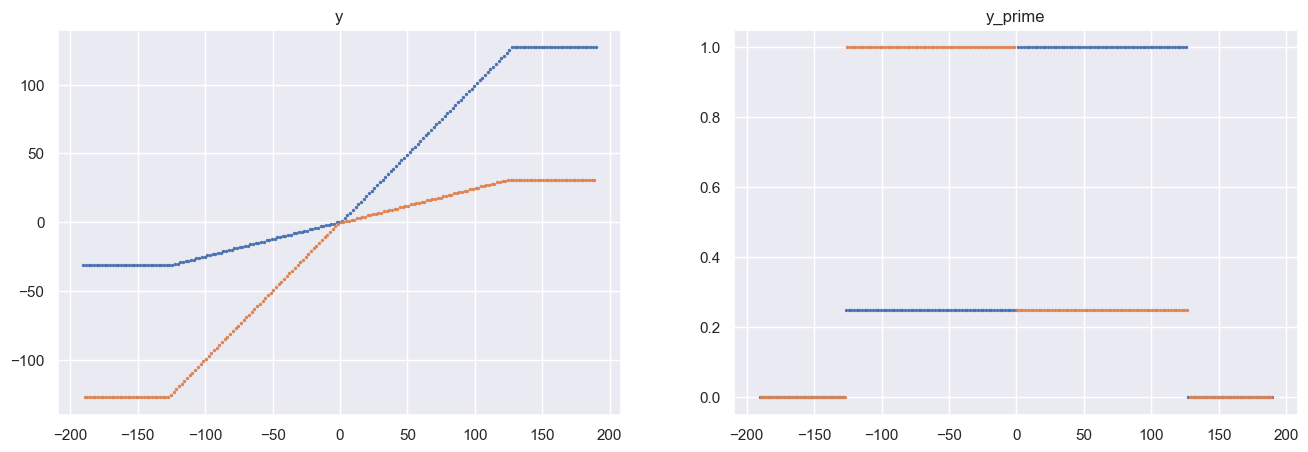

In [37]:
plot_bipolar(x, y, y_prime)

## Integer (floored) division

In [38]:
y = x // 32
y_prime = np.zeros(y.shape)

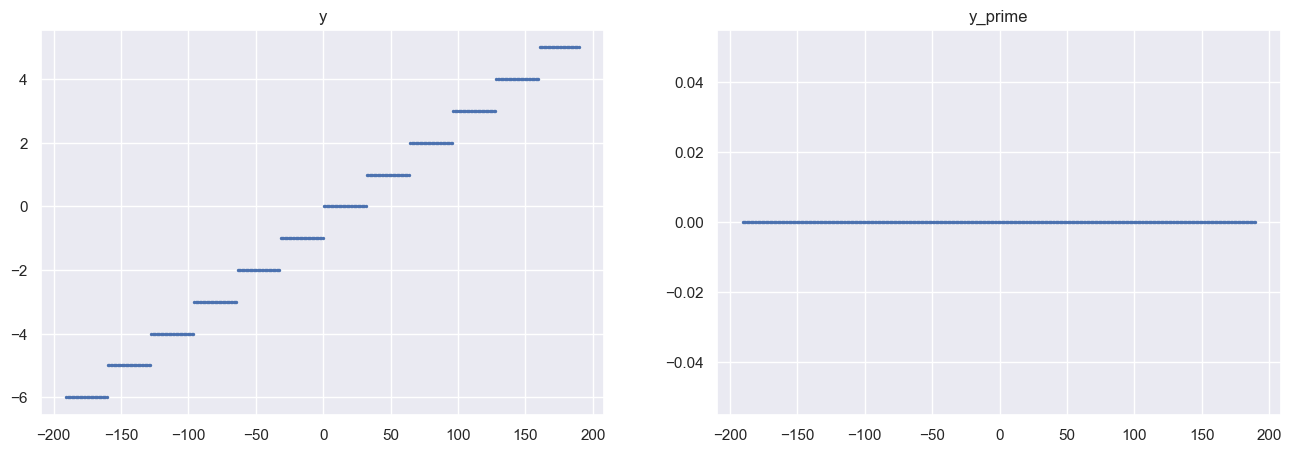

In [39]:
plot(x, y, y_prime)

## Truncated division

In [40]:
from lib.utils.misc import truncated_division

In [41]:
y = truncated_division(x, 32)
y_prime = np.zeros(y.shape)

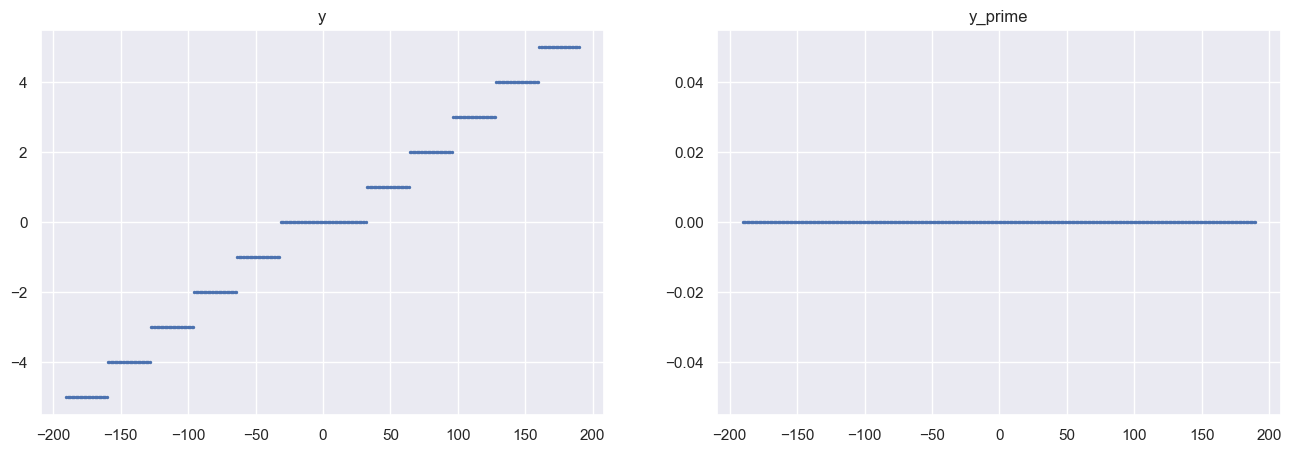

In [42]:
plot(x, y, y_prime)